## 1. Veri Setinin Yüklenmesi ve Genel İnceleme

Bu adımda, Breast Cancer Wisconsin (Diagnostic) veri setini `kagglehub` kütüphanesi aracılığıyla indiriyoruz. Veri, meme kanseri teşhislerine ilişkin ölçümleri içermekte olup, iyi huylu (benign) ve kötü huylu (malignant) tümörleri sınıflandırmak için kullanılacaktır.

Veri kümesini inceledikten sonra temel istatistiksel analizler, eksik değer kontrolü ve görselleştirmelerle devam edeceğiz.


In [1]:
# Gerekli kütüphaneleri yükleyelim
!pip install -q kagglehub pandas matplotlib seaborn scikit-learn

# KaggleHub ile veri setini indir
import kagglehub

# Breast Cancer Wisconsin (Diagnostic) veri setini indir
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Veri kümesi indirildiği klasör:", path)


Veri kümesi indirildiği klasör: /kaggle/input/breast-cancer-wisconsin-data


## 2. Veri Setinin İlk İncelemesi

Bu bölümde, veri setini `pandas` kütüphanesi ile yüklüyoruz ve temel yapısını inceliyoruz.  
Amacımız:
- Veri çerçevesinin boyutunu öğrenmek
- Sütun adlarını görüntülemek
- İlk birkaç satırı inceleyerek verinin genel yapısı hakkında fikir edinmek


In [2]:
import pandas as pd

# CSV dosyasının yolu (indirilen klasörde 'data.csv' bulunur)
csv_path = f"{path}/data.csv"

# Veriyi pandas ile oku
df = pd.read_csv(csv_path)

# Veri çerçevesinin boyutuna bakalım
print("Veri seti boyutu:", df.shape)

# İlk 5 satırı görüntüle
df.head()


Veri seti boyutu: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Eksik Değer Kontrolü ve Temel İstatistiksel Analiz

Bu adımda veri setinde herhangi bir eksik (null) değer olup olmadığını kontrol ediyoruz.  
Ayrıca hedef değişken olan `diagnosis` sütunundaki sınıf dağılımına ve tüm sayısal değişkenlerin özet istatistiklerine göz atıyoruz.


In [3]:
# Eksik değer var mı?
print("Eksik değer kontrolü:")
print(df.isnull().sum())

# Hedef sütun: diagnosis (B: benign, M: malignant)
print("\nSınıf dağılımı:")
print(df["diagnosis"].value_counts())

# Sayısal sütunların özet istatistikleri
df.describe()


Eksik değer kontrolü:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 4. Veri Temizleme ve Hedef Değişkenin Dönüştürülmesi

Bu adımda:
- Tüm değerleri boş olan `Unnamed: 32` sütununu kaldırıyoruz.
- Sadece tanımlayıcı bilgi içeren `id` sütununu kaldırıyoruz.
- Kategorik hedef sütun olan `diagnosis` değerlerini sayısala çeviriyoruz:
  - Malignant (M) → 1
  - Benign (B) → 0
Bu dönüşümler, makine öğrenmesi modelleriyle uyumlu bir veri seti elde etmemizi sağlar.


In [4]:
# Gereksiz sütunları kaldır
df = df.drop(columns=["id", "Unnamed: 32"])

# Hedef değişkeni sayısal hale getir: M → 1, B → 0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Kontrol edelim
print("Yeni veri seti boyutu:", df.shape)
print("Yeni diagnosis değerleri:\n", df["diagnosis"].value_counts())


Yeni veri seti boyutu: (569, 31)
Yeni diagnosis değerleri:
 diagnosis
0    357
1    212
Name: count, dtype: int64


## 5. Korelasyon Analizi ve Görselleştirme

Bu adımda:
- Değişkenler arası korelasyonları hesaplayacağız.
- Özellikle `diagnosis` (hedef değişken) ile en güçlü pozitif ve negatif korelasyona sahip özellikleri belirleyeceğiz.
- Tüm korelasyonları bir ısı haritası (heatmap) ile görselleştireceğiz.

Bu analiz, modelin öğrenebileceği anlamlı örüntülerin nerelerde yoğunlaştığını anlamamıza yardımcı olur.


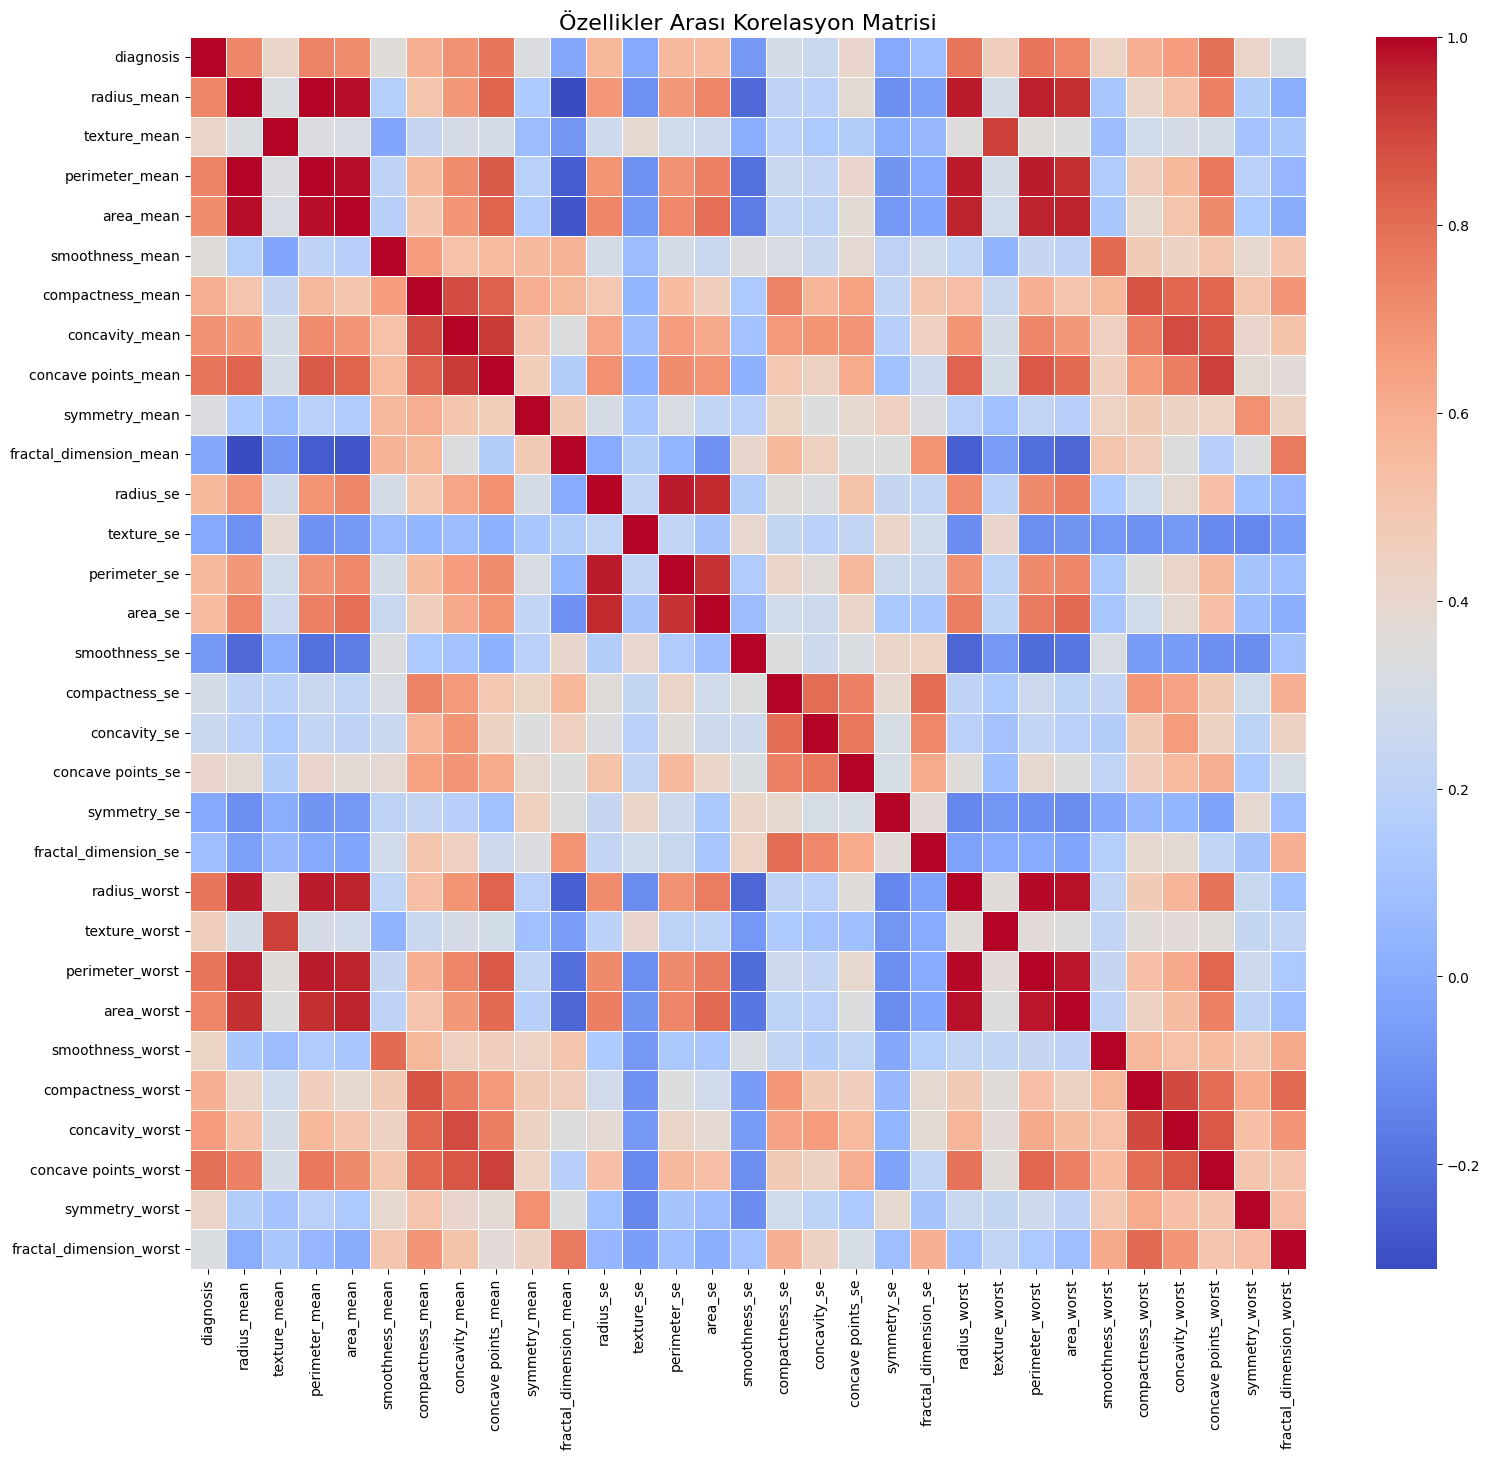

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesapla
corr = df.corr()

# Şekli büyütelim
plt.figure(figsize=(18, 16))

# Korelasyon ısı haritası
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Özellikler Arası Korelasyon Matrisi", fontsize=16)
plt.show()


In [6]:
# Diagnosis ile en yüksek korelasyona sahip özellikleri sıralayalım
target_corr = corr["diagnosis"].drop("diagnosis")
top_features = target_corr.abs().sort_values(ascending=False).head(10)

print("Diagnosise en çok korelasyonu olan 10 özellik:")
print(top_features)


Diagnosise en çok korelasyonu olan 10 özellik:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


## 6. Özellik Ölçeklendirme (Standardizasyon)

Çoğu makine öğrenmesi algoritması, özellikle mesafeye duyarlı olanlar (SVM, KNN, Lojistik Regresyon vb.) için ölçeklendirilmiş verilerle daha iyi performans gösterir.  
Bu yüzden tüm sayısal özellikleri `StandardScaler` kullanarak standartlaştırıyoruz:
- Ortalama: 0
- Standart Sapma: 1

Not: Hedef değişken `diagnosis` ölçeklendirme dışında tutulur.


In [7]:
from sklearn.preprocessing import StandardScaler

# Özellikleri ve hedefi ayır
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# StandardScaler uygulayalım
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ölçeklendirilmiş veriyi DataFrame'e dönüştürelim (istenirse)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Kontrol: İlk birkaç satıra bakalım
X_scaled_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 7. Eğitim ve Test Verisi Olarak Bölme

Bu adımda:
- Özellikler (`X_scaled`) ile hedef değişken (`y`) kullanılarak veri eğitim ve test setlerine ayrılır.
- `test_size=0.2` yani verinin %80'i eğitim, %20'si test için kullanılır.
- `stratify=y` parametresi, sınıf dağılımının her iki sette de benzer olmasını sağlar.
- `random_state=42` ile sonuçların tekrarlanabilir olması sağlanır.


In [8]:
from sklearn.model_selection import train_test_split

# Eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Kontrol edelim
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)


Eğitim verisi boyutu: (455, 30)
Test verisi boyutu: (114, 30)


## 8.1 Geleneksel Model: Logistic Regression

Logistic Regression, ikili sınıflandırma problemlerinde yaygın kullanılan ve iyi performans gösteren basit bir modeldir.  
Burada modelimizi eğitim verisi üzerinde eğitecek, test verisi üzerinde tahmin yapacağız ve performansını değerlendireceğiz.


Doğruluk (Accuracy): 0.9649122807017544

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



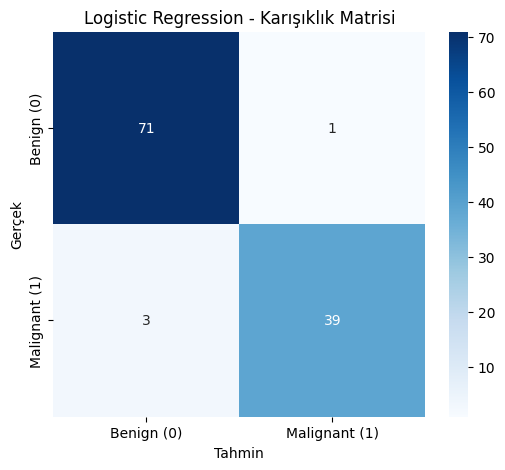

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modeli oluştur ve eğit
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = logreg.predict(X_test)

# Başarı ölçümleri
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix) görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.title('Logistic Regression - Karışıklık Matrisi')
plt.show()


## 8.2 Geleneksel Model: Support Vector Machine (SVM)

SVM, özellikle yüksek boyutlu ve karmaşık sınıflandırma problemlerinde güçlü bir modeldir.  
Veriyi uygun bir hiper-düzleme ayırarak sınıflandırma yapar.  
Burada varsayılan kernel (RBF) ile eğitim ve test yapacağız.


SVM Doğruluk (Accuracy): 0.9736842105263158

SVM Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



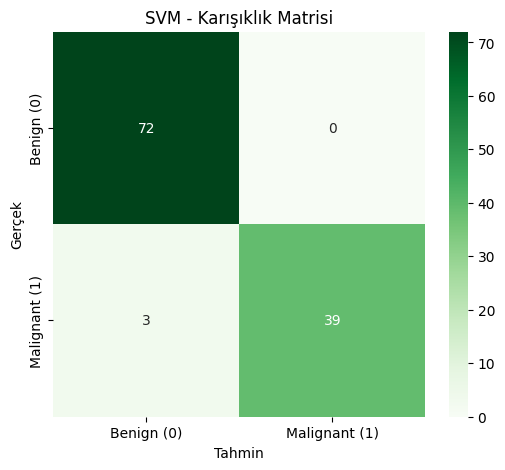

In [10]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_svm))
print("\nSVM Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.title('SVM - Karışıklık Matrisi')
plt.show()


## 8.3 Geleneksel Model: Random Forest

Random Forest, çok sayıda karar ağacının birleşimiyle çalışan güçlü ve dayanıklı bir topluluk (ensemble) modelidir.  
Aşırı öğrenme (overfitting) riskini azaltır ve genellikle iyi performans gösterir.


Random Forest Doğruluk (Accuracy): 0.9736842105263158

Random Forest Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



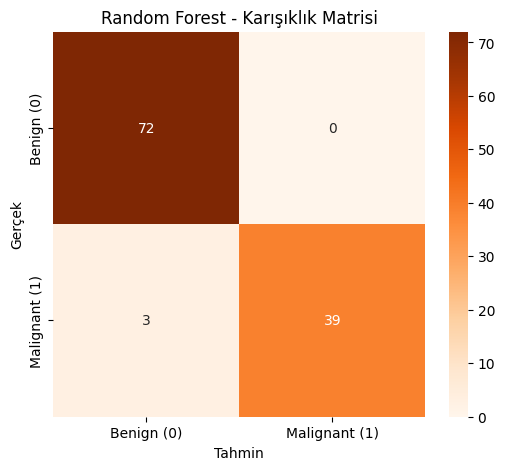

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.title('Random Forest - Karışıklık Matrisi')
plt.show()


## 8.4 Geleneksel Model: K-Nearest Neighbors (KNN)

KNN, sınıflandırma yaparken en yakın komşulara (örnek sayısı K kadar) bakar.  
Basit ama etkili bir yöntemdir, özellikle doğru K değeri seçildiğinde iyi sonuç verir.


KNN Doğruluk (Accuracy): 0.956140350877193

KNN Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



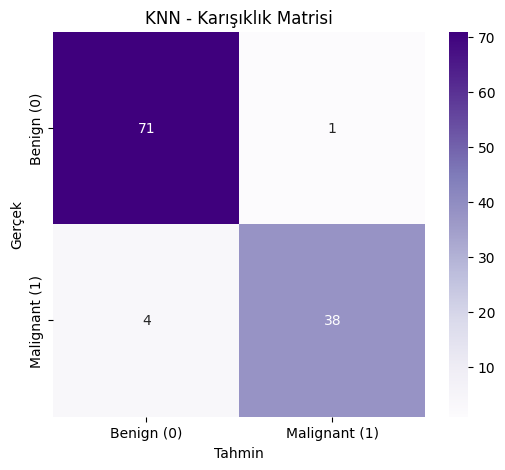

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Doğruluk (Accuracy):", accuracy_score(y_test, y_pred_knn))
print("\nKNN Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.title('KNN - Karışıklık Matrisi')
plt.show()


## 9. Derin Öğrenme Modeli: Yapay Sinir Ağı (MLP)

Bu bölümde TensorFlow/Keras kullanarak basit bir çok katmanlı yapay sinir ağı (MLP) modeli kurulmuştur.  
Model, tüm özellikleri girdi olarak alır ve ikili sınıflandırma için sigmoid aktivasyon fonksiyonu kullanır.

Model aşağıdaki gibi yapılandırılmıştır:
- Girdi katmanı: 30 özellik
- 2 gizli katman (dense): 16 ve 8 nöronlu, ReLU aktivasyonlu
- Çıkış katmanı: 1 nöron, sigmoid aktivasyon
- Kayıp fonksiyonu: binary_crossentropy
- Optimizasyon: Adam
- Performans metriği: accuracy


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9815 - loss: 0.0781
Test Doğruluğu (Accuracy): 0.9824561476707458


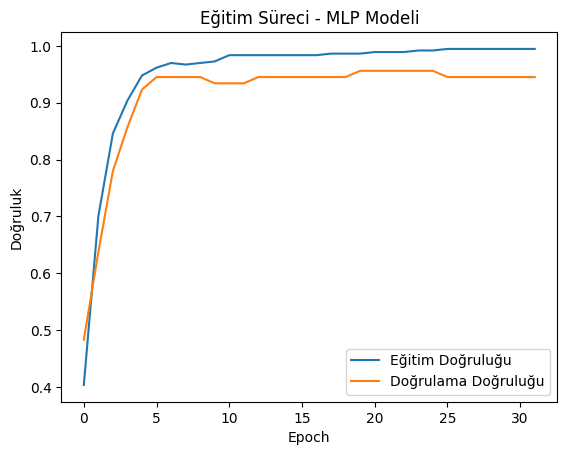

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model oluşturma
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Eğitim
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stop], verbose=0)

# Performans
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Doğruluğu (Accuracy):", accuracy)

# Grafik: Eğitim süreci
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Eğitim Süreci - MLP Modeli')
plt.legend()
plt.show()


## 10. ROC Eğrileri ve AUC Karşılaştırması

ROC eğrisi, sınıflandırma modellerinin başarısını görsel olarak değerlendirmek için kullanılır.  
X ekseninde yanlış pozitif oran (FPR), Y ekseninde ise doğru pozitif oran (TPR) yer alır.  
Eğrinin altında kalan alan (AUC), modelin genel performansını özetler.  
AUC değeri 1'e ne kadar yakınsa model o kadar başarılıdır.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


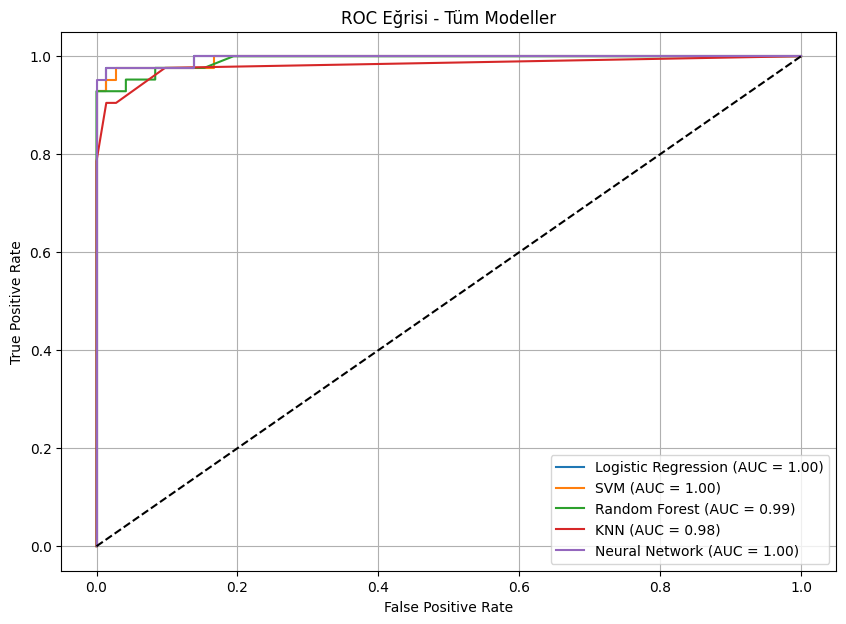

In [17]:
from sklearn.metrics import roc_curve, auc

# Tüm modellerin olasılık tahminleri
y_pred_lr_proba =logreg.predict_proba(X_test)[:, 1]
y_pred_svm_proba = svm_model.decision_function(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred_knn_proba = knn_model.predict_proba(X_test)[:, 1]
y_pred_nn_proba = model.predict(X_test).ravel()  # Neural Net

# ROC eğrileri
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_proba)

# AUC skorları
auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)
auc_knn = auc(fpr_knn, tpr_knn)
auc_nn = auc(fpr_nn, tpr_nn)

# ROC eğrilerinin çizimi
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Rastgele model çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi - Tüm Modeller")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Model Performans Karşılaştırması

Aşağıdaki tabloda, geleneksel makine öğrenmesi ve derin öğrenme modellerinin doğruluk (Accuracy), kesinlik (Precision), geri çağırma (Recall), F1 skoru ve AUC değerleri yer almaktadır.

Bu karşılaştırma sonucunda, özellikle sağlık alanında kritik öneme sahip olan hatalı negatifleri azaltmak için yüksek **Recall** ve **AUC** değerleri olan modeller ön plana çıkmaktadır.

Bu analiz sonucunda en uygun modelin seçilmesi, hem doğruluk hem de hasta teşhisinde riskin minimize edilmesi açısından büyük önem taşımaktadır.


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Sınıf tahminleri
y_pred_lr = logreg.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Olasılık tahminleri
y_pred_lr_proba = logreg.predict_proba(X_test)[:, 1]
y_pred_svm_proba = svm_model.decision_function(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred_knn_proba = knn_model.predict_proba(X_test)[:, 1]
y_pred_nn_proba = model.predict(X_test).ravel()

# Metriği hesaplayan fonksiyon
def get_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba)
    }

# Sonuçları topla
results = {
    "Logistic Regression": get_metrics(y_test, y_pred_lr, y_pred_lr_proba),
    "SVM": get_metrics(y_test, y_pred_svm, y_pred_svm_proba),
    "Random Forest": get_metrics(y_test, y_pred_rf, y_pred_rf_proba),
    "KNN": get_metrics(y_test, y_pred_knn, y_pred_knn_proba),
    "Neural Network": get_metrics(y_test, y_pred_nn, y_pred_nn_proba)
}

# DataFrame'e dönüştür
import pandas as pd
results_df = pd.DataFrame(results).T
results_df = results_df.round(3)
results_df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.965,0.975,0.929,0.951,0.996
SVM,0.974,1.000,0.929,0.963,0.995
Random Forest,0.974,1.000,0.929,0.963,0.993
KNN,0.956,0.974,0.905,0.938,0.982
Neural Network,0.982,1.000,0.952,0.976,0.996


In [19]:
import joblib

joblib.dump(logreg, "logreg.pkl")
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(knn_model, "knn_model.pkl")
model.save("nn_model.h5")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [20]:
from google.colab import files

files.download("logreg.pkl")
files.download("svm_model.pkl")
files.download("rf_model.pkl")
files.download("knn_model.pkl")
files.download("nn_model.h5")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>